## Teste Martim - PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


In [13]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"code/raw_data/heart_failure_clinical_records_dataset.csv", na_values=["?"])
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
# Select features (all columns except target)
X = data.drop(columns=["DEATH_EVENT"])  # all features except the target

# Select target
y = data["DEATH_EVENT"]

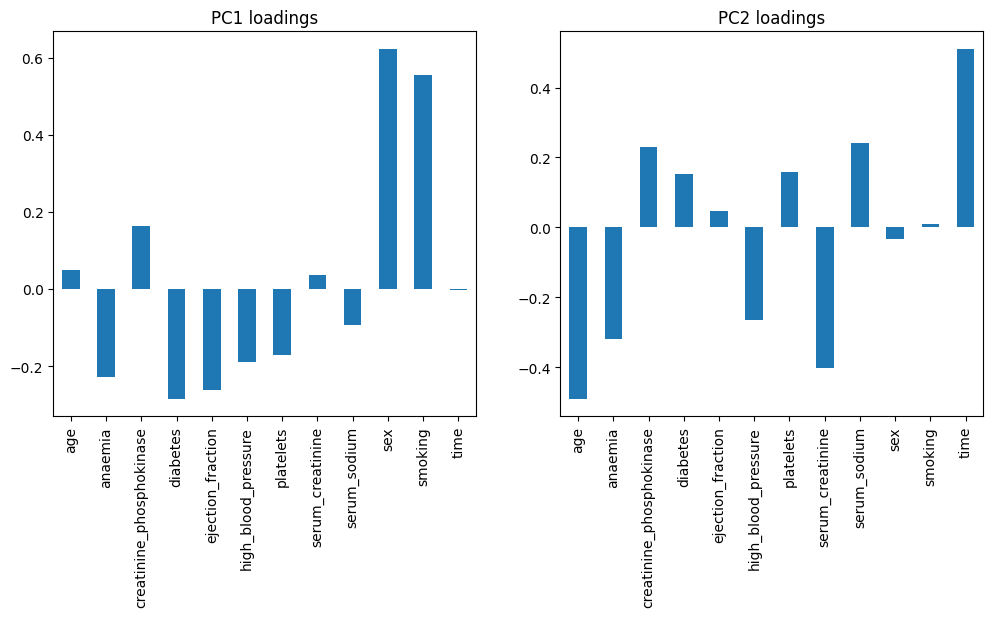

In [17]:
X_std = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(X.columns))], 
                        index=X.columns)

# Exemplo: plotar PC1 e PC2
fig, axes = plt.subplots(1, 2, figsize=(12,5))
loadings['PC1'].plot(kind='bar', ax=axes[0], title="PC1 loadings")
loadings['PC2'].plot(kind='bar', ax=axes[1], title="PC2 loadings")
plt.show()

### Principal directions of the considered PCA components (3.4)

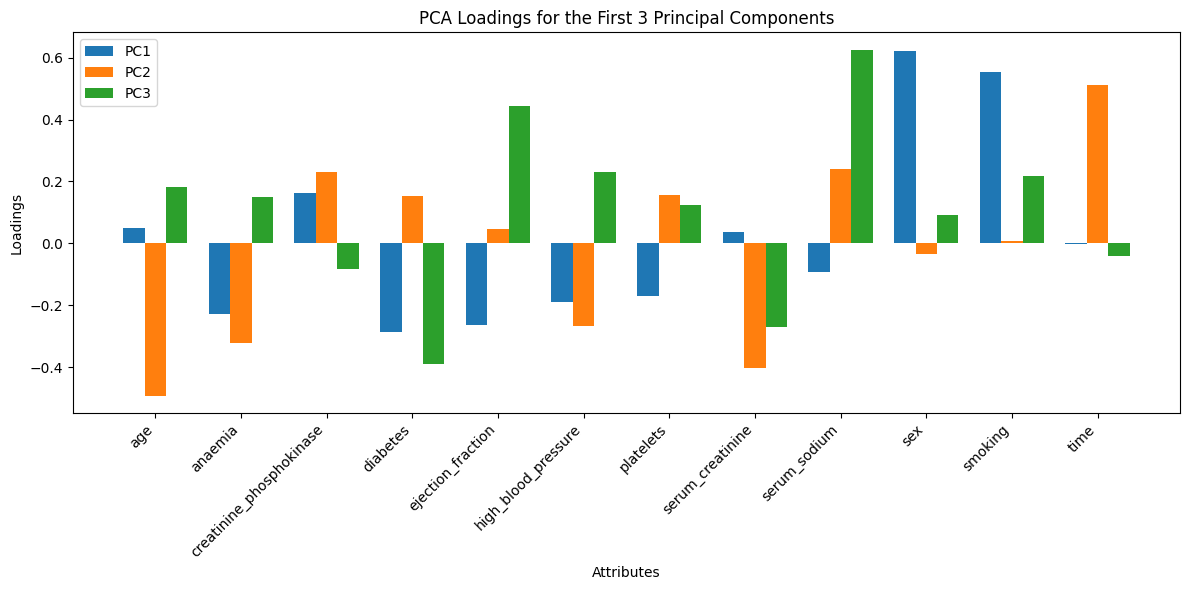

Principal Component 1 explains 13.86% of the variance.
Principal Component 2 explains 13.16% of the variance.
Principal Component 3 explains 10.57% of the variance.


In [24]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  PCA w/ 3 components
pca = PCA(n_components=3)
pca.fit(X_scaled)

# principal components
loadings = pca.components_.T
attributes = X.columns

# plot of the weights of each variable for the 3 Principal components
plt.figure(figsize=(12, 6))
for i in range(loadings.shape[1]):
    plt.bar(np.arange(len(attributes)) + i*0.25, loadings[:, i], width=0.25, label=f'PC{i+1}')

plt.xticks(np.arange(len(attributes)) + 0.25, attributes, rotation=45, ha='right')
plt.xlabel('Attributes')
plt.ylabel('Loadings')
plt.title('PCA Loadings for the First 3 Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

# variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i} explains {var:.2%} of the variance.")


Variance explained by PC1: 13.86%
Variance explained by PC2: 13.16%


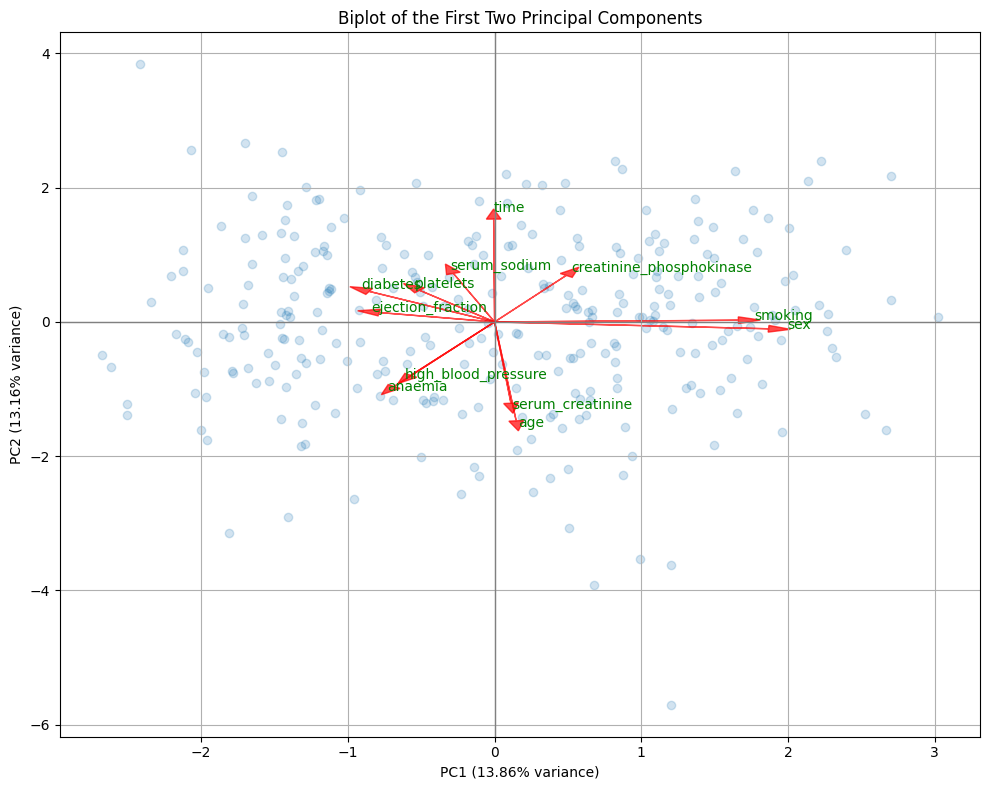

In [25]:
# Variância explicada
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")

# Componentes (loadings)
loadings = pca.components_.T
attributes = X.columns

# Biplot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

for i, attr in enumerate(attributes):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, attr, color='g')

plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance)")
plt.title("Biplot of the First Two Principal Components")
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()

### The amount of variance explained as a function of the number of PCA components included (3.5)

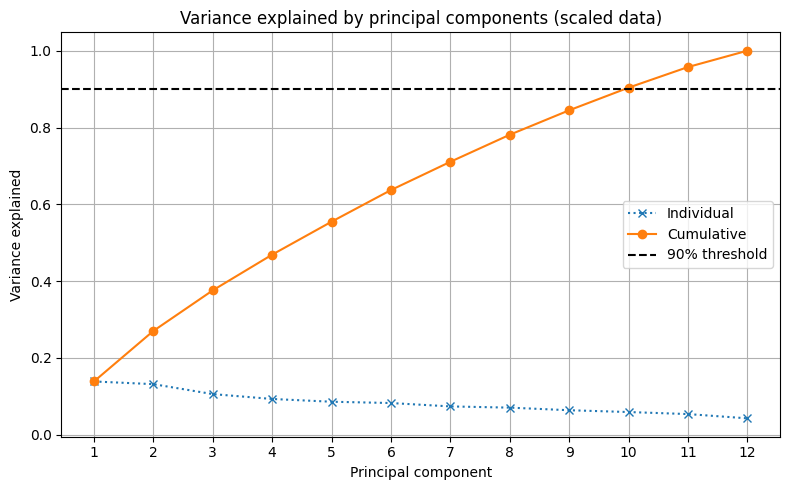

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)

explained_var_individual = pca.explained_variance_ratio_
explained_var_cumulative = explained_var_individual.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var_individual)+1), explained_var_individual, marker='x', linestyle=':', label='Individual')
plt.plot(range(1, len(explained_var_cumulative)+1), explained_var_cumulative, marker='o', label='Cumulative')
plt.axhline(0.9, color='k', linestyle='--', label='90% threshold')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.title('Variance explained by principal components (scaled data)')
plt.xticks(range(1, len(explained_var_individual)+1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

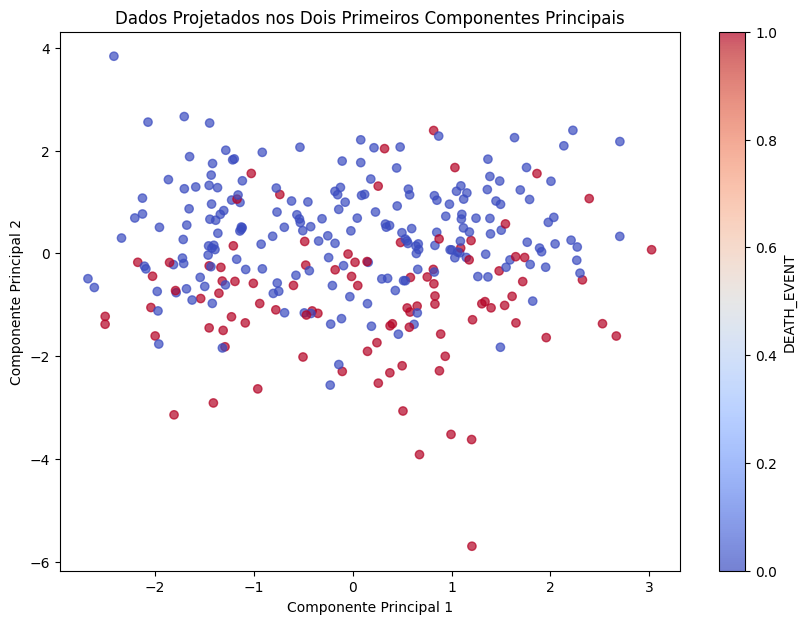

In [41]:
# Padronizar as características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plotar os dados projetados nos dois primeiros componentes principais
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Dados Projetados nos Dois Primeiros Componentes Principais')
plt.colorbar(scatter, label='DEATH_EVENT')
plt.show()

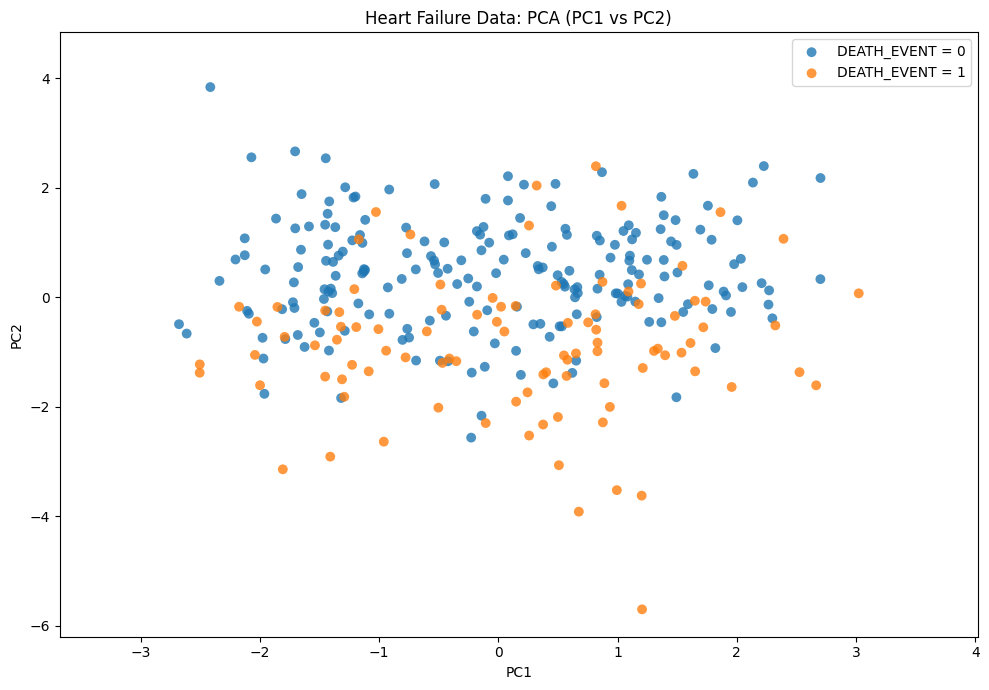

In [67]:
plt.figure(figsize=(10, 7))

# Scatter plot com transparência e paleta discreta para melhor contraste
colors = ['#1f77b4', '#ff7f0e']
for t, color in zip([0, 1], colors):
    indices = y == t
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], c=color, label=f'DEATH_EVENT = {t}', alpha=0.8, edgecolors='none', s=50)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Heart Failure Data: PCA (PC1 vs PC2)')

plt.legend(frameon=True)
plt.grid(False)
plt.box(True)

plt.xlim(pca_result[:,0].min() - 1, pca_result[:,0].max() + 1)
plt.ylim(pca_result[:,1].min() - 0.5, pca_result[:,1].max() + 1)
plt.tight_layout()
plt.show()